In [163]:
import numpy as np
import matplotlib.pyplot as plt


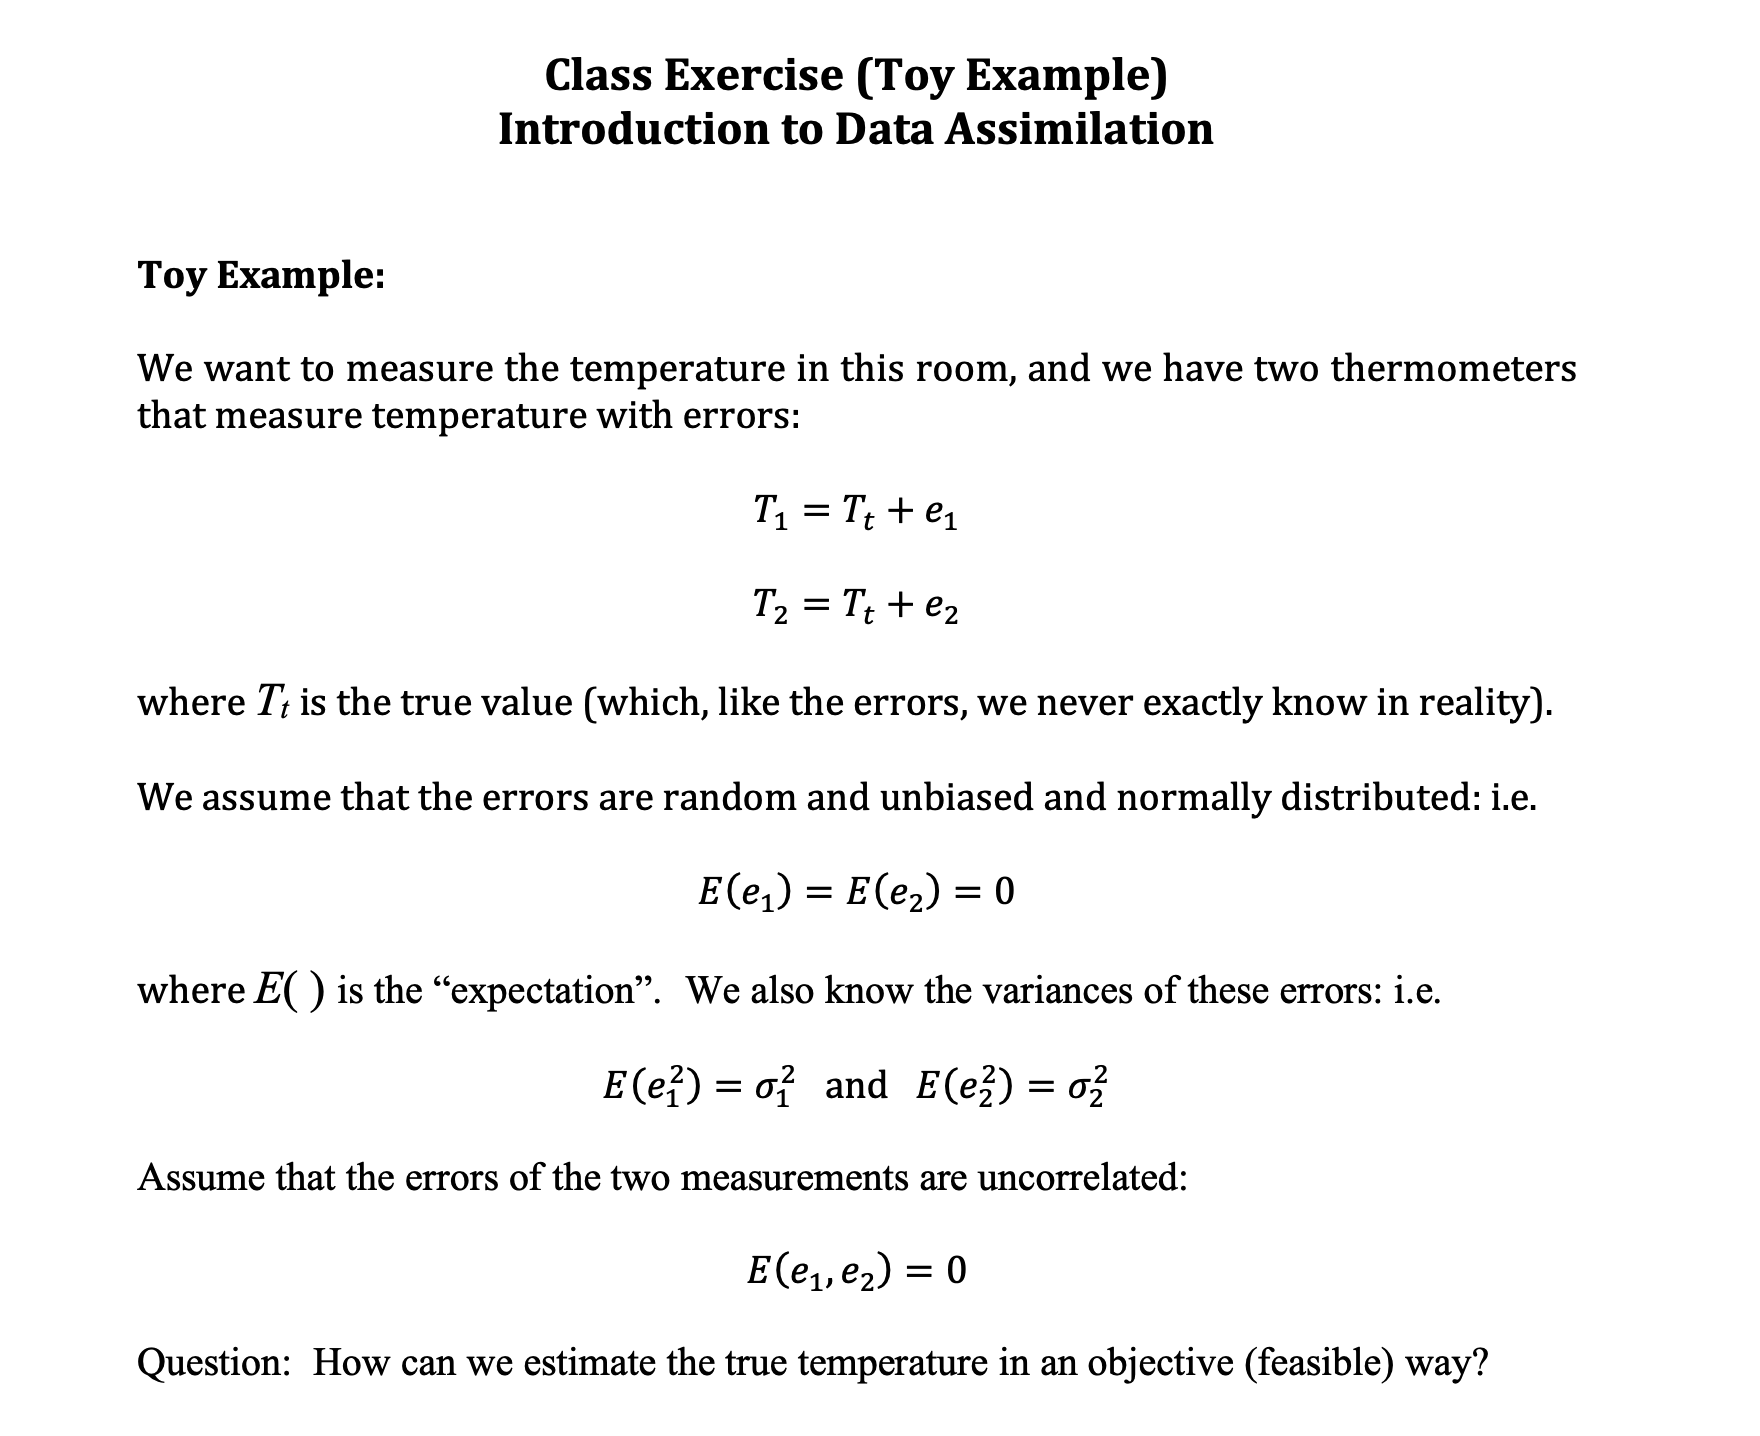

## An Example

In [164]:
# editable variables
Tt = 297  # degrees Kelvin

# Set e1 and e2
mu1 = 0  # mean of e1
mu2 = 0  # mean of e2
sigma1 = 1  # standard deviation of e1
sigma2 = 2  # standard deviation of e2
nsamples = 1000  # number of samples (realization)

In [165]:
# generate nsamples of e1 and e2 given their characteristics
np.random.seed(1)  # for reproducibility
e1 = mu1 + sigma1 * np.random.randn(nsamples)
e2 = mu2 + sigma2 * np.random.randn(nsamples)

# generate nsamples of T1 and T2 (our observations)
T1 = Tt + e1
T2 = Tt + e2

In [166]:
# check statistics

print('Mean and Std Deviation of e1')
print([np.mean(e1), np.std(e1)])
print('Mean and Std Deviation of e2')
print([np.mean(e2), np.std(e2)])
print('Correlation between T1 and T2')
print(np.corrcoef(T1, T2)[0, 1])

Mean and Std Deviation of e1
[0.038812476159601844, 0.9810041339322116]
Mean and Std Deviation of e2
[0.05465088678915608, 2.0600748564339146]
Correlation between T1 and T2
0.021856951028048806


In [167]:
# Estimate the true temperature as a linear combination of 2 pieces of information
inf = 1
sigma2a = sigma2 * inf

a1 = sigma2a**2 / (sigma1**2 + sigma2a**2)
a2 = sigma1**2 / (sigma1**2 + sigma2a**2)

Ta = a1 * T1 + a2 * T2
sigmaa = np.sqrt((sigma1**2 * sigma2**2) / (sigma1**2 + sigma2**2))

print('a1, a2, and sigmaa')
print([a1, a2, sigmaa])

a1, a2, and sigmaa
[0.8, 0.2, 0.8944271909999159]


In [168]:
# Check if our estimate is more accurate
print('T1, T2, Ta, Tt')
print([np.mean(T1), np.mean(T2), np.mean(Ta), Tt])
print('Root mean square errors for T1, T2, and Ta')
print([np.sqrt(np.mean((T1 - Tt)**2)), np.sqrt(np.mean((T2 - Tt)**2)), np.sqrt(np.mean((Ta - Tt)**2))])

# Find coefficients using covariances
X = np.column_stack((T1, T2))
Y = Ta
b1 = np.cov(X[:, 0], Y)[0, 1] / np.var(X[:, 0])
b2 = np.cov(X[:, 1], Y)[0, 1] / np.var(X[:, 1])


print('b1, b2')
print([b1, b2])

T1, T2, Ta, Tt
[297.0388124761596, 297.05465088678915, 297.04198015828547, 297]
Root mean square errors for T1, T2, and Ta
[0.9817716226789863, 2.0607996344958077, 0.895304318384425]
b1, b2
[0.8099897584655976, 0.20853512937781654]


## Interactive Slider

In [169]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout, HBox, Label, VBox, RadioButtons
import ipywidgets as widgets

In [177]:

def all(Tt,
        mu1,
        mu2,
        sigma1,
        sigma2,
        nsamples,
        choice,
        inf):

    np.random.seed(1)  # for reproducibility
    e1 = mu1 + sigma1 * np.random.randn(nsamples)
    e2 = mu2 + sigma2 * np.random.randn(nsamples)

    # generate nsamples of T1 and T2 (our observations)
    T1 = Tt + e1
    T2 = Tt + e2

    minn,maxx = np.nanpercentile([T1 + e1,T2+ e2],[1,99])

    # Diagnostics
    # check histogram of T1 & T2
    plt.figure(1, figsize=(15, 2.5))
    plt.subplot(1, 3, 1)
    n1, x1, _ = plt.hist(T1, bins=25, density=True, color='blue', alpha=0.7, histtype='step')
    plt.plot(Tt, 0, c='k', markersize=50)
    plt.axvline(Tt, c='b',lw=2)
    plt.xlim(minn, maxx)

    plt.text(0.02,0.85,f'$T_t$ = {Tt:0.1f} K', transform = plt.gca().transAxes)
    plt.text(0.02,0.72,f'$\overline {{T_1}}$ = {np.mean(T1):0.1f} K', transform = plt.gca().transAxes, color='b')

    plt.xlabel('Temperature', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title(r'Histogram of $T_1$', fontsize=15)

    plt.subplot(1, 3, 2)
    n2, x2, _ = plt.hist(T2, bins=25, density=True, color='red', alpha=0.7, histtype='step')
    plt.plot(Tt, 0, c='k', markersize=50)
    plt.xlim(minn, maxx)
    plt.axvline(Tt, c='r',lw=2)

    plt.text(0.02,0.85,f'$T_t$ = {Tt:0.1f} K', transform = plt.gca().transAxes)
    plt.text(0.02,0.72,f'$\overline {{T_2}}$ = {np.mean(T2):0.1f} K', transform = plt.gca().transAxes, color='r')

    plt.xlabel('Temperature', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title(r'Histogram of $T_2$', fontsize=15)

    plt.subplot(1,3,3)
    plt.scatter(T1, T2, c='g', s=10, alpha=0.8)
    plt.scatter(Tt, Tt, c='k', s=50)
    plt.xlim(minn, maxx)
    plt.ylim(minn, maxx)
    plt.axvline(Tt,c='dimgrey')
    plt.axhline(Tt,c='dimgrey')
    plt.gca().set_aspect(1)
    plt.xlabel(r'$T_1$ (deg Kelvin)', fontsize=12)
    plt.ylabel(r'$T_2$ (deg Kelvin)', fontsize=12)
    rho = (np.corrcoef(T1, T2)[0, 1])

    plt.title(f'$T_1$ vs $T_2$ \n'+rf'$\rho$ = {rho:0.2f}', fontsize=15)
    plt.axline((0,0),slope=1,c='dimgrey',ls='--')

    plt.show()


    # Estimate the true temperature as a linear combination of 2 pieces of information
    # Let's assume sigma2 is unknown.

    #inf = 1

    if choice == 'Sigma 2':
        sigma2a = sigma2 * inf
        sigma1a = sigma1
    elif choice == 'Sigma 1':
        sigma1a = sigma1 * inf
        sigma2a = sigma2
    else:
        sigma1a = sigma1
        sigma2a = sigma2

    a1 = sigma2a**2 / (sigma1a**2 + sigma2a**2)
    a2 = sigma1a**2 / (sigma1a**2 + sigma2a**2)

    Ta = a1 * T1 + a2 * T2
    sigmaa = np.sqrt((sigma1a**2 * sigma2a**2) / (sigma1a**2 + sigma2a**2))

    rmse_t1 = np.sqrt(np.mean((T1 - Tt)**2))
    rmse_t2 = np.sqrt(np.mean((T2 - Tt)**2)) 
    rmse_ta = np.sqrt(np.mean((Ta - Tt)**2))

    layout = [
    ["A", "A", "A","B","C"],
    ]   
    fig, axd = plt.subplot_mosaic(layout, figsize=(15,2.5))

    print('_'*150)

#    plt.figure(2, figsize=(15, 2.5))
    C = ['b','r','g']
    axd['A'].plot(T1, '.', color=C[0], markersize=5)
    axd['A'].plot(T2, '.', color=C[1], markersize=5)
    axd['A'].plot(Ta, '.', color=C[2], markersize=5)
    axd['A'].plot(np.arange(1, len(Ta) + 1), Tt * np.ones(len(Ta)), c='k',lw=2)
    axd['A'].set_ylim(minn, maxx)
    axd['A'].grid(True, axis='y')
    axd['A'].set_xlabel('Realizations', fontsize=12)
    axd['A'].set_ylabel('Temperature (deg Kelvin)', fontsize=12)
    axd['A'].legend(['T_1', 'T_2', 'T_a', 'T_t'], loc='best', fontsize=12, bbox_to_anchor=(0.8,-0.2), ncol=4)

    axd['A'].set_title('DA Performance \n'+f'$T_t$ = {Tt:0.1f} K \t $T_a$ = {np.mean(Ta):0.1f} K \t $\sigma_a$ = {sigmaa:0.2f} K \t $a_1 = {a1:0.1f}$ \t $a_2$ = {a2:0.1f}'+
              f'\n $RMSE_1$ = {rmse_t1:0.2f} K \t $RMSE_2$ = {rmse_t2:0.2f} K \t $RMSE_a$ = {rmse_ta:0.2f} K', fontsize=15)
    
    axd['B'].scatter(T1,Ta, s=5, c=C[0])
    axd['B'].set_xlim(minn, maxx)
    axd['B'].set_ylim(minn, maxx)
    axd['B'].axvline(Tt,c='dimgrey',lw=0.3)
    axd['B'].axhline(Tt,c='dimgrey',lw=0.3)
    axd['B'].set_aspect(1)
    axd['B'].axline((0,0),slope=1,c=C[2],ls='--')
    axd['B'].set_title(f'$T_1$ vs $T_a$')

    axd['C'].scatter(T2, Ta, s=5, c=C[1])
    axd['C'].set_xlim(minn, maxx)
    axd['C'].set_ylim(minn, maxx)
    axd['C'].axvline(Tt,c='dimgrey',lw=0.3)
    axd['C'].axhline(Tt,c='dimgrey',lw=0.3)
    axd['C'].set_aspect(1)
    axd['C'].axline((0,0),slope=1,c=C[2],ls='--')
    axd['C'].set_title(f'$T_2$ vs $T_a$')
    

s1 = FloatSlider(min=0.1, max=10, step=0.2, value=1, description='Std. Dev of T1 ',readout_format='.2f',
           layout=Layout(width='50%', height='20px'), style = {'description_width': '150px'})
s2 = FloatSlider(min=0.1, max=10, step=0.2, value=2, description='Std. Dev of T2 ',readout_format='.2f',
           layout = s1.layout, style = s1.style)
ns = IntSlider(min=50, max=5000, step=50, value=1000, description = 'No. of Samples ', layout = s1.layout, style = s1.style)

choice1 = widgets.ToggleButtons(
    options=['Sigma 1','Sigma 2'],
    description="You don't know.....",
    disabled=False
)

inf = FloatSlider(min=0.1, max=2, step=0.1, value=1, layout = s1.layout, style = s1.style, description = 'INF')

x = interactive(all, Tt = fixed(297), mu1=fixed(0), mu2=fixed(0),
                sigma1 = s1,
                sigma2 = s2,
                nsamples = ns,
                choice = choice1,
                inf = inf)
# output = x.children[-1]
# output.layout.height = '750px'
display(x)


interactive(children=(FloatSlider(value=1.0, description='Std. Dev of T1 ', layout=Layout(height='20px', width…